## OB1 performance on the flanker task and the sentence task

In [1]:
from tqdm import tqdm
import mne
import numpy as np
import glob
import os
import pickle
import scipy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats 
import seaborn as sns

### OB1 performance on the sentence reading task (experiment 2)

In [19]:
df = pd.read_pickle("/Users/pleunvaartjes/Documents/python/OB1_general_map/OB1/Results/alldata_Sentence.pkl")
df=pd.DataFrame(df) #NV: had to add this, as above
df.head(3)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/pleunvaartjes/Documents/python/OB1_general_map/OB1/Results/alldata_Sentence.pkl'

In [14]:
data2plot = df.copy(deep=True)
data2plot['RT'] = df['reaction time'].str[0]
data2plot['correct'] = df['correct'].str[0]
data2plot['position'] = df['position'].astype(str)

In [15]:
data2plot.head(300)

,stimulus,prime,target,condition,cycle,lexicon activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,eye position,attention position,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr,RT
0,les vers sont loin,[],les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.896...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 19, 19, 19, 19, 19, 1...",9,9,0.655094,3.998309,0,[1075],0,1,1,1075
1,ces loups vont voir,[],ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.986...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 24, 24, 24, 24, 24, 2...",9,9,0.800000,0.000000,0,[1075],0,1,2,1075
2,ton mec est vert,[],ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.536...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 14, 14, 14, 14, 14, 1...",8,8,0.737891,1.713742,0,[1075],0,1,3,1075
3,votre reine était bonne,[],votre,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.22...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04146667583159084, 0.04146667583159084, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 32, 32, 32, 32, 32, 3...",11,11,0.800000,0.000000,0,[1075],0,1,4,1075
4,votre roi était grand,[],votre,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.697...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04428953835103596, 0.04428953835103596, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 32, 32, 32, 32, 32, 3...",10,10,0.800000,0.000000,0,[1075],0,1,5,1075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,danse amie bien son,[],amie,scrambled,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.18...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 23, 23, 23, 23, 23, 2...",9,9,0.724564,2.081455,0,[575],1,2,296,575
296,bien aimes vivre tu,[],aimes,scrambled,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.55...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 23, 23, 23, 23, 23, 2...",9,9,0.719129,2.231419,0,[575],1,2,297,575
297,dit vous ils ont,[],vous,scrambled,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.044...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 15, 15, 15, 15, 15, 1...",8,8,0.650205,4.133210,0,[575],1,2,298,575
298,bons è amis nous,[],è,scrambled,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.052...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 16, 16, 16, 16, 16, 1...",8,8,0.800000,0.000000,0,[1075],0,2,299,1075


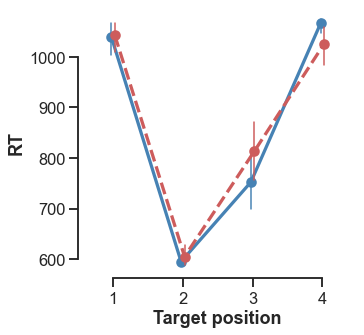

In [16]:
# Initialize the figure
f, ax = plt.subplots(figsize=(5,5))

# # Show each observation with a scatterplot
# sns.stripplot(x="position", y="RT", hue="condition",
#               data=data2plot, dodge=False, jitter=True, 
#               alpha=.4)

# Show the conditional means
sns.pointplot(x="position", y="RT", hue="condition", linestyles=['-', '--'],
              data=data2plot, dodge=.05, join=True,errwidth=1.5, palette = ['steelblue', 'indianred'],
                scale=0.8,order=["1", "2","3","4"],bw=.2)

#sns.lineplot(x="position", y="RT",
 #             data=data2plot)

ax.set_xlabel("Target position",fontdict=dict(weight='bold'))
ax.set_ylabel("RT",fontdict=dict(weight='bold'))
# ax.set_yticks([300, 400, 500,600, 700, 800, 900, 1000, 1100, 1200, 1300])
ax.legend_.remove()

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)





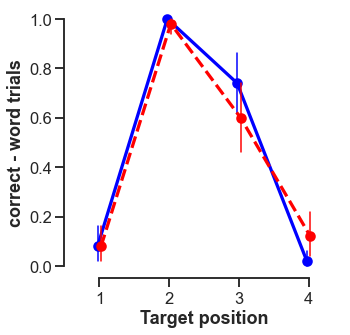

In [17]:
error = {1:0, 0:1}
data2plot['error'] = data2plot["correct"].replace(error, inplace=False)

# Initialize the figure
f, ax = plt.subplots(figsize=(5,5))

# # Show each observation with a scatterplot
# sns.stripplot(x="position", y="error",  hue="condition",
#               data=data2plot, dodge=False, jitter=True,
#               alpha=.4)

# Show the conditional means
sns.pointplot(x="position", y="correct", hue="condition", linestyles=['-', '--'],palette=['blue', 'red'],
              data=data2plot, dodge=.05, join=True,errwidth=1.5,
                scale=0.8,order=["1", "2","3","4"],bw=.2)

# ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xlabel("Target position",fontdict=dict(weight='bold'))
ax.set_ylabel("correct - word trials",fontdict=dict(weight='bold'))
ax.legend_.remove()

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


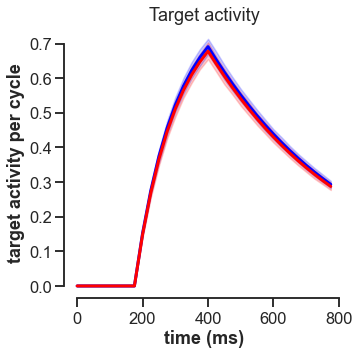

In [18]:
target2plot = df.copy(deep=True)

target2plot = target2plot.explode('target activity per cycle')
target2plot = target2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
target2plot["cycle nr"] = m
target2plot['time']= target2plot['cycle nr']*25


target2plot["target activity per cycle"] = pd.to_numeric(target2plot["target activity per cycle"].str[0], downcast="float")
f, ax = plt.subplots(figsize=(5,5))

sns.lineplot(data=target2plot, x="time", y="target activity per cycle", hue = "condition",color ='black' , ci=95,  linewidth=3, palette = ['blue', 'red'], legend=False)

ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("target activity per cycle",fontdict=dict(weight='bold'))
ax.set_title("Target activity")

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


### Then for lexicon

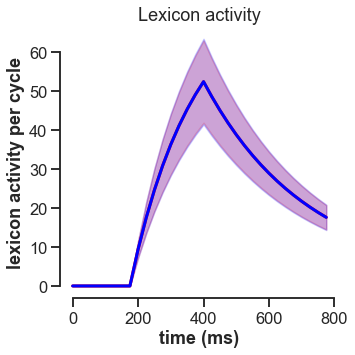

In [19]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('lexicon activity per cycle')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= lexicon2plot['cycle nr']*25


lexicon2plot["lexicon activity per cycle"] = pd.to_numeric(lexicon2plot["lexicon activity per cycle"], downcast="float")
f, ax = plt.subplots(figsize=(5,5))

sns.lineplot(data=lexicon2plot, x="time", y="lexicon activity per cycle", hue = "condition", palette = ['red','blue'], legend=False,color ='black' , ci='sd',  linewidth=3)

ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("lexicon activity per cycle",fontdict=dict(weight='bold'))
ax.set_title("Lexicon activity")


sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


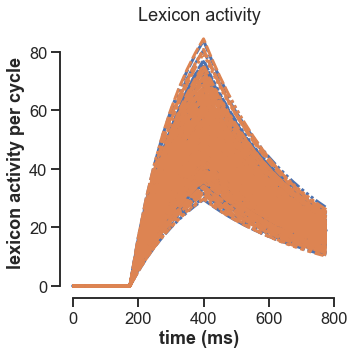

In [20]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('lexicon activity per cycle')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= lexicon2plot['cycle nr']*25


lexicon2plot["lexicon activity per cycle"] = pd.to_numeric(lexicon2plot["lexicon activity per cycle"], downcast="float")
f, ax = plt.subplots(figsize=(5,5))

sns.lineplot(data=lexicon2plot, x="time", y="lexicon activity per cycle", hue = "condition", style="trial", legend=False,color ='black' , ci=95,  linewidth=3)

ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("lexicon activity per cycle",fontdict=dict(weight='bold'))
ax.set_title("Lexicon activity")


sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


In [21]:
lexicon2plot.head(2)

lexicon_peak = lexicon2plot[(lexicon2plot['time']>=400) & (lexicon2plot['time']<= 402)].copy(deep=True)

In [22]:
lexicon_peak.head(30)


,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,...,attention position,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr,cycle nr,time
16,0,les vers sont loin,[],les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",55.946941,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 19, 19, 19, 19, 19, 1...",...,9,0.655094,3.998309,0,[1075],[0],1,1,16,400
48,1,ces loups vont voir,[],ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",52.413509,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 24, 24, 24, 24, 24, 2...",...,9,0.800000,0.000000,0,[1075],[0],1,2,16,400
80,2,ton mec est vert,[],ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",38.084389,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 14, 14, 14, 14, 14, 1...",...,8,0.737891,1.713742,0,[1075],[0],1,3,16,400
112,3,votre reine était bonne,[],votre,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",75.468285,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04146667583159084, 0.04146667583159084, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 32, 32, 32, 32, 32, 3...",...,11,0.800000,0.000000,0,[1075],[0],1,4,16,400
144,4,votre roi était grand,[],votre,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",54.791161,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04428953835103596, 0.04428953835103596, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 32, 32, 32, 32, 32, 3...",...,10,0.800000,0.000000,0,[1075],[0],1,5,16,400
176,5,ton homme sera jeune,[],ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",50.250805,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04428953835103596, 0.04428953835103596, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 25, 25, 25, 25, 25, 2...",...,10,0.737891,1.713742,0,[1075],[0],1,6,16,400
208,6,ton cou est gros,[],ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",37.917858,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 15, 15, 15, 15, 15, 1...",...,8,0.737891,1.713742,0,[1075],[0],1,7,16,400
240,7,elles sont avec lui,[],elles,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",59.198139,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 21, 21, 21, 21, 21, 2...",...,9,0.704909,2.623776,0,[1075],[0],1,8,16,400
272,8,cet ours mange tout,[],cet,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",55.319195,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 24, 24, 24, 24, 24, 2...",...,9,0.702187,2.698892,0,[1075],[0],1,9,16,400
304,9,cet ours vit ici,[],cet,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",45.861042,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 15, 15, 15, 15, 15, 1...",...,8,0.702187,2.698892,0,[1075],[0],1,10,16,400


,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,...,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr,cycle nr,time,bin
16,0,les vers sont loin,[],les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",55.946941,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 19, 19, 19, 19, 19, 1...",...,0.655094,3.998309,0,[1075],[0],1,1,16,400,7
48,1,ces loups vont voir,[],ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",52.413509,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 24, 24, 24, 24, 24, 2...",...,0.800000,0.000000,0,[1075],[0],1,2,16,400,6
80,2,ton mec est vert,[],ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",38.084389,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 14, 14, 14, 14, 14, 1...",...,0.737891,1.713742,0,[1075],[0],1,3,16,400,1


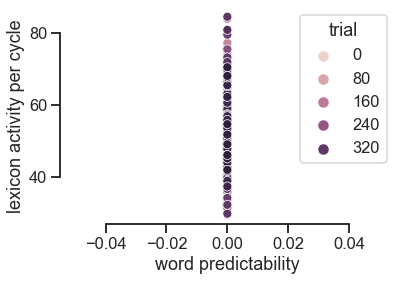

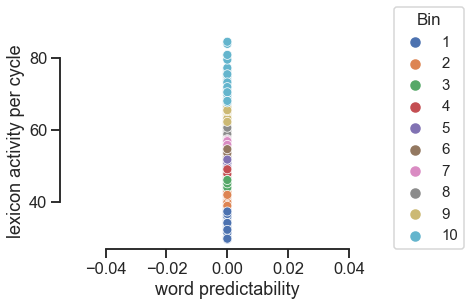

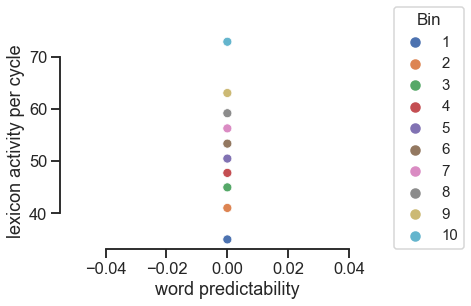

In [23]:
#lexicon_peak
sns.scatterplot(data=lexicon_peak,  x="word predictability", y="lexicon activity per cycle", hue = "trial",
               )

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

bin_labels_10 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
lexicon_peak['bin'] = pd.qcut(lexicon_peak['lexicon activity per cycle'],
                              q=10,
                              labels=bin_labels_10)

plt.figure()
scat = sns.scatterplot(data=lexicon_peak,  x="word predictability", y="lexicon activity per cycle", hue = "bin",
                #color ='black',
            #kind="line", ci=95,  linewidth=3
               )

scat.legend(fontsize = 15, \
               bbox_to_anchor= (1.23, 1.15), \
               title="Bin", \
               title_fontsize = 17, \
               shadow = False, \
               facecolor = 'white');

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

plt.figure()
scat = sns.scatterplot(data=lexicon_peak.groupby(['bin']).mean(),  x="word predictability", y="lexicon activity per cycle", hue = "bin",
                #color ='black',
            #kind="line", ci=95,  linewidth=3
               )

scat.legend(fontsize = 15, \
               bbox_to_anchor= (1.23, 1.15), \
               title="Bin", \
               title_fontsize = 17, \
               shadow = False, \
               facecolor = 'white');

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

lexicon_peak.to_pickle('/Users/pleunvaartjes/Documents/python/OB1_general_map/OB1_analysis/Noor_versie/2020_reading_EEG/Data/Sentencelexicon.pkl')
lexicon_peak.head(3)

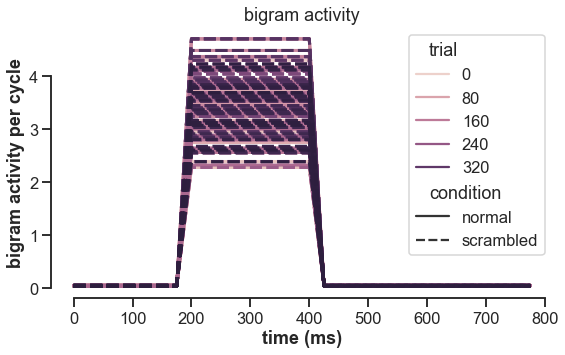

In [24]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('bigram activity per cycle')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= (lexicon2plot['cycle nr'])*25


lexicon2plot["bigram activity per cycle"] = pd.to_numeric(lexicon2plot["bigram activity per cycle"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=lexicon2plot, x="time", y="bigram activity per cycle", hue = "trial", style='condition',color ='black' , ci='sd',  linewidth=3,
             #palette=["yellow", "blue", "coral"], legend=True
            )

ax.set_title("bigram activity")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("bigram activity per cycle",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)



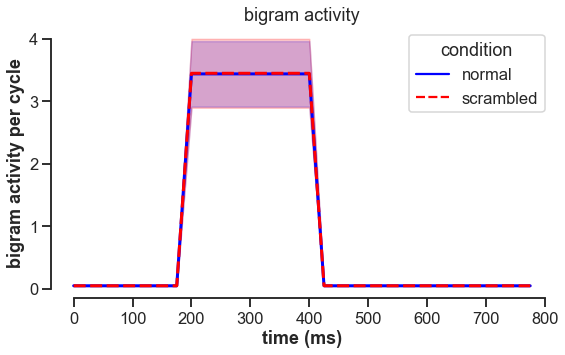

In [25]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('bigram activity per cycle')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= (lexicon2plot['cycle nr'])*25


lexicon2plot["bigram activity per cycle"] = pd.to_numeric(lexicon2plot["bigram activity per cycle"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=lexicon2plot, x="time", y="bigram activity per cycle", hue = "condition", style='condition',color ='black' , ci='sd',  linewidth=3,
             palette=["blue", "red"], legend=True
            )

ax.set_title("bigram activity")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("bigram activity per cycle",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)



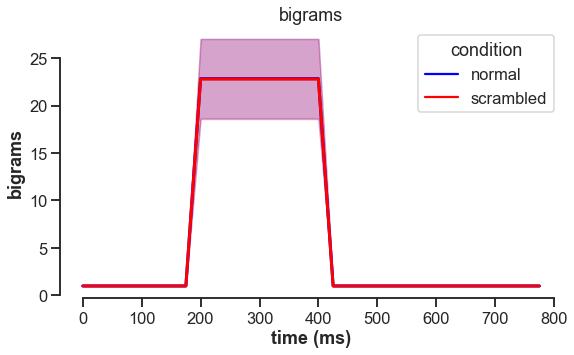

In [26]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('ngrams')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= (lexicon2plot['cycle nr'])*25


lexicon2plot["ngrams"] = pd.to_numeric(lexicon2plot["ngrams"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=lexicon2plot, x="time", y="ngrams", hue = "condition",color ='black' , ci='sd',  linewidth=3,
             palette=["blue", "red"], legend=True
            )

ax.set_title("bigrams")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("bigrams",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)




In [27]:
lexicon2plot.head(2)

lexicon_peak = lexicon2plot[(lexicon2plot['time']>=400) & (lexicon2plot['time']<= 402)].copy(deep=True)

In [28]:
lexicon_peak.head(30)


,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,...,attention position,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr,cycle nr,time
16,0,les vers sont loin,[],les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.896...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...",19.0,...,9,0.655094,3.998309,0,[1075],[0],1,1,16,400
48,1,ces loups vont voir,[],ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.986...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...",24.0,...,9,0.800000,0.000000,0,[1075],[0],1,2,16,400
80,2,ton mec est vert,[],ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.536...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...",14.0,...,8,0.737891,1.713742,0,[1075],[0],1,3,16,400
112,3,votre reine était bonne,[],votre,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.22...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04146667583159084, 0.04146667583159084, 0.0...",32.0,...,11,0.800000,0.000000,0,[1075],[0],1,4,16,400
144,4,votre roi était grand,[],votre,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.697...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04428953835103596, 0.04428953835103596, 0.0...",32.0,...,10,0.800000,0.000000,0,[1075],[0],1,5,16,400
176,5,ton homme sera jeune,[],ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.964...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04428953835103596, 0.04428953835103596, 0.0...",25.0,...,10,0.737891,1.713742,0,[1075],[0],1,6,16,400
208,6,ton cou est gros,[],ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.453...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...",15.0,...,8,0.737891,1.713742,0,[1075],[0],1,7,16,400
240,7,elles sont avec lui,[],elles,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.63...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...",21.0,...,9,0.704909,2.623776,0,[1075],[0],1,8,16,400
272,8,cet ours mange tout,[],cet,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.713...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...",24.0,...,9,0.702187,2.698892,0,[1075],[0],1,9,16,400
304,9,cet ours vit ici,[],cet,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.947...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...",15.0,...,8,0.702187,2.698892,0,[1075],[0],1,10,16,400


,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,...,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr,cycle nr,time,bin
16,0,les vers sont loin,[],les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.896...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...",19.0,...,0.655094,3.998309,0,[1075],[0],1,1,16,400,2
48,1,ces loups vont voir,[],ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.986...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...",24.0,...,0.800000,0.000000,0,[1075],[0],1,2,16,400,6
80,2,ton mec est vert,[],ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.536...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.05130153651098328, 0.05130153651098328, 0.0...",14.0,...,0.737891,1.713742,0,[1075],[0],1,3,16,400,1


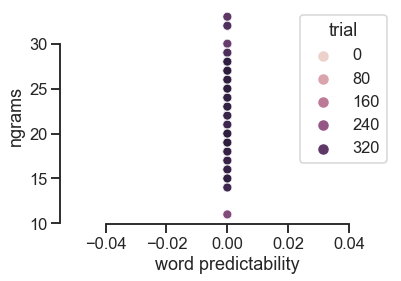

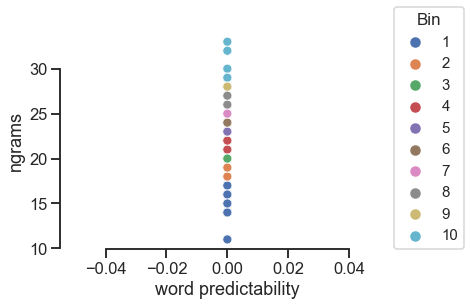

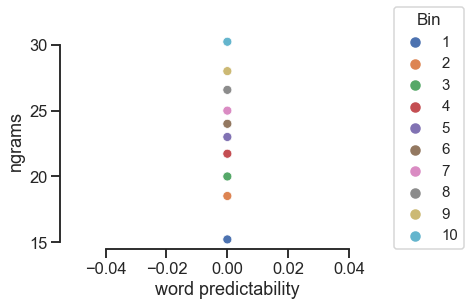

In [29]:
#lexicon_peak
sns.scatterplot(data=lexicon_peak,  x="word predictability", y="ngrams", hue = "trial",
               )

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

bin_labels_10 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
lexicon_peak['bin'] = pd.qcut(lexicon_peak['ngrams'],
                              q=10,
                              labels=bin_labels_10)

plt.figure()
scat = sns.scatterplot(data=lexicon_peak,  x="word predictability", y="ngrams", hue = "bin",
                #color ='black',
            #kind="line", ci=95,  linewidth=3
               )

scat.legend(fontsize = 15, \
               bbox_to_anchor= (1.23, 1.15), \
               title="Bin", \
               title_fontsize = 17, \
               shadow = False, \
               facecolor = 'white');

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

plt.figure()
scat = sns.scatterplot(data=lexicon_peak.groupby(['bin']).mean(),  x="word predictability", y="ngrams", hue = "bin",
                #color ='black',
            #kind="line", ci=95,  linewidth=3
               )

scat.legend(fontsize = 15, \
               bbox_to_anchor= (1.23, 1.15), \
               title="Bin", \
               title_fontsize = 17, \
               shadow = False, \
               facecolor = 'white');

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

lexicon_peak.to_pickle('/Users/pleunvaartjes/Documents/python/OB1_general_map/OB1_analysis/Noor_versie/2020_reading_EEG/Data/Sentencelexicon_ngrams.pkl')
lexicon_peak.head(3)

In [30]:
lexicon2plot = df.copy(deep=True)
lexicon2plot['stripped']= lexicon2plot['stimulus'].str.replace(" ","")
lexicon2plot['nletters']= lexicon2plot['stripped'].str.len()

#(lexicon2plot['stimulus'].str.strip()).len(
lexicon2plot.head(2)


,stimulus,prime,target,condition,cycle,lexicon activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,eye position,attention position,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr,stripped,nletters
0,les vers sont loin,[],les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.896...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 19, 19, 19, 19, 19, 1...",9,9,0.655094,3.998309,0,[1075],[0],1,1,lesverssontloin,15
1,ces loups vont voir,[],ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.986...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.04752848480323874, 0.04752848480323874, 0.0...","[1, 1, 1, 1, 1, 1, 1, 1, 24, 24, 24, 24, 24, 2...",9,9,0.800000,0.000000,0,[1075],[0],1,2,cesloupsvontvoir,16


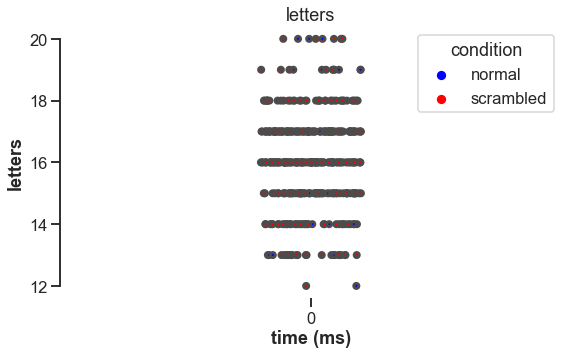

In [31]:


lexicon2plot["nletters"] = pd.to_numeric(lexicon2plot["nletters"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.stripplot(data=lexicon2plot, x="word predictability", y="nletters", hue = "condition",  linewidth=3,
             palette=["blue", "red"], dodge=False, jitter=True,
            )

ax.set_title("letters")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("letters",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


